### Projeto Machine Learning II

In [39]:
#Bibliotecas de manipulação de datasets
import pandas as pd
import numpy as np

#Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning

In [40]:
churn = pd.read_csv('customer_churn_dataset-training-master.csv')

churn.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
print(churn.shape)
churn.info()

(440833, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
#Encontrei essa ferramenta abaixo, que é tipo um describe/info pra dataset, acho ela mais visual e fácil de analisar, mas precisa instalar.
#Caso alguém tenha interesse. pra instalar é só por: "pip install sumarytools" e depois "pip install Jinja2"

#from summarytools import dfSummary
#dfSummary(churn)


Temos 12 colunas sendo destas:
- 1 coluna Target ('Churn')
- 1 coluna de ID
- 3 colunas com informações categóricas
- 7 colunas com informações numéricas


In [79]:
#Customer ID pode ser removida
churn.drop(columns="CustomerID", inplace=True)

In [5]:
churn.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

- Dataset com poucos valores nulos.

In [6]:
# Encontrando os valores nulos:
churn[churn.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Os valores nulos estão concentrados todos em uma única linha, portanto esta será removida.

In [7]:
# No início haviam 440 883 linhas, no final é verificado que uma delas foi removida.
churn.dropna(inplace=True)
churn.shape[0]

440832

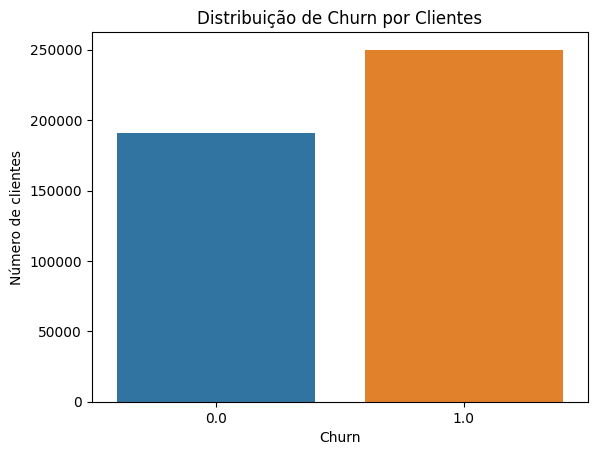

In [8]:
sns.countplot(data=churn, x='Churn')

#Pensar num título melhor
plt.title('Distribuição de Churn por Clientes')
plt.ylabel('Número de clientes')
plt.xlabel('Churn')
plt.show()

In [9]:
churn['Churn'].value_counts(normalize=True)

Churn
1.0    0.567107
0.0    0.432893
Name: proportion, dtype: float64

- Há um baixo desbalanceamento entre clientes com churn positivo e negativo **(validar com o professor a necessidade de over/under sampling ?)**.

*(Com minha inexistente experiência,) eu diria que não precisa* 

#### Avaliando os clientes com churn positivo x negativo:

In [10]:
# Avaliando somente os churns positivos
churn_positive = churn[churn['Churn']==1]

print(churn_positive.shape)
churn_positive.head()

(249999, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [11]:
churn_positive.drop(columns=['CustomerID', 'Churn']).describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
count,249999.000000,249999.000000,249999.000000,249999.000000,249999.000000,249999.000000,249999.000000
mean,41.747263,30.473598,15.461658,5.144861,15.217729,541.285528,15.604546
std,13.975085,17.341065,8.675252,3.141639,8.974081,259.850723,8.654930
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,30.000000,15.000000,8.000000,2.000000,7.000000,316.000000,8.000000
50%,42.000000,30.000000,15.000000,5.000000,15.000000,534.000000,16.000000
75%,54.000000,46.000000,23.000000,8.000000,23.000000,767.000000,23.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


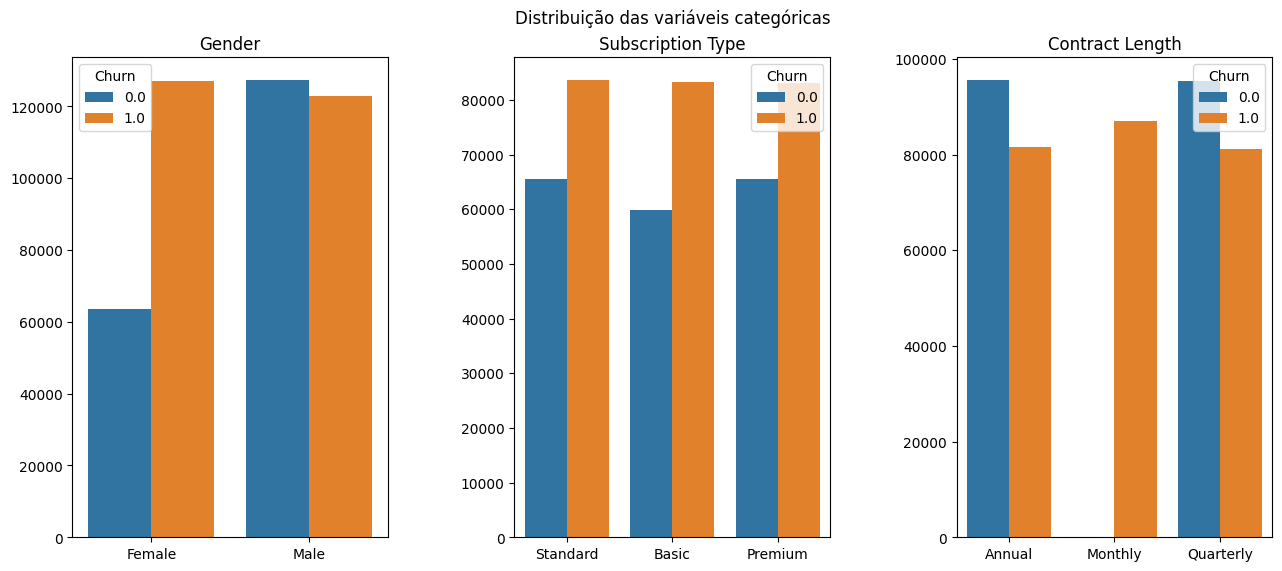

In [12]:
category_list = ['Gender', 'Subscription Type', 'Contract Length']
count = 1

plt.subplots(1,3, figsize=(15,6))

for category in category_list:
    plt.subplot(1,3,count)
    sns.countplot(data=churn, x=category, hue='Churn')
    plt.ylabel('')
    plt.xlabel('')
    plt.title(category)
    count += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    
plt.suptitle('Distribuição das variáveis categóricas')
plt.show()

- Há uma diferença expressiva entre churns positivos e negativos para clientes do sexo feminino.
- Não há clientes de churn negativo que apresentem tempo de contrato mensal (deve afetar o modelo, pois pelo que lembro, no dataset de treino há um bom valor nesse campo *[rever]* ).

In [13]:
churn['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

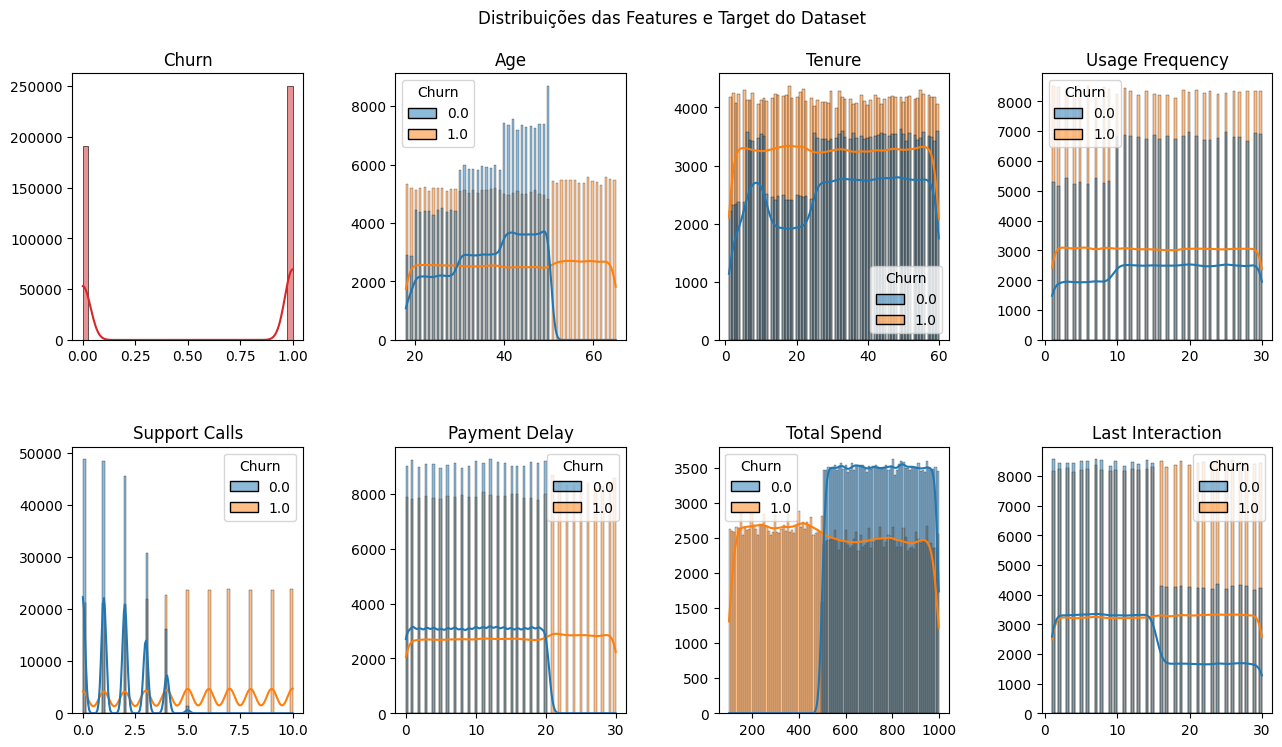

In [14]:
numeric_list = ['Churn', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

fig = plt.figure(figsize=(15,8))

for number, category in enumerate(numeric_list, start=1):
    if category == 'Churn':
        ax = fig.add_subplot(2,4,number)
        sns.histplot(data=churn, x=category, kde=True, color='tab:red')
        plt.title(category)
        ax.set_ylabel('')
        ax.set_xlabel('')
    else:
        ax = fig.add_subplot(2, 4,number)
        sns.histplot(data=churn, x=category, hue='Churn', kde=True)
        plt.title(category)
        ax.set_ylabel('')
        ax.set_xlabel('')      

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Distribuições das Features e Target do Dataset')
plt.show()

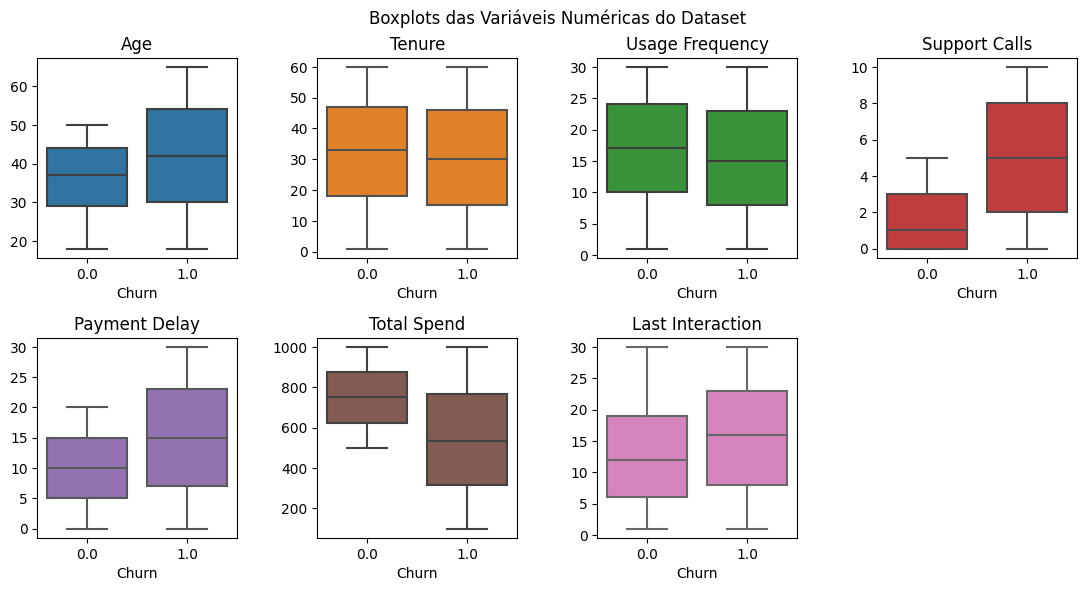

In [44]:
# Boxplot das features
numeric_list = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
colors = {1:'tab:blue', 2:'tab:orange', 3:'tab:green', 4:'tab:red', 5:'tab:purple', 6:'tab:brown', 7: 'tab:pink'}

fig= plt.figure(figsize=(13,6))

for number, category in enumerate(numeric_list, start=1):
    ax = fig.add_subplot(2,4,number)
    sns.boxplot(data=churn, y=category, x='Churn', color=colors[number])
    plt.title(category)
    plt.xlabel('Churn')
    ax.set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Boxplots das Variáveis Numéricas do Dataset')
plt.show()

- Nenhuma distribuição segue a curva Normal
- Várias se aproximam de uma distribuição uniforme

- Distribuições das variáveis tem tendências contrárias quando separadas por Churn positivo ou negativo

```Fernando:```

Eu particularmente quero (e preciso) rever o módulo de Estatística I, então (se der tempo) vou tentar fazer alguns testes de hipótese a partir de algumas inferências, como:
- Os clientes de churn negativo tem idade máxima até ~50 anos (ainda vou rever como escrever bem as inferências)
- Clientes de churn negativo tem gastos superior a 500
- Clientes de churn negativo não costumam ter atrasos superior a 20 dias
...

Não prometo que vai dar certo (não criem expectativas kkkkkk) e vou focar na parte geral que precisamos entregar segunda.

- Distribuições de ```Age, Support Calls, Payment Delay e Total Spend``` possuem diferenças entre churns negativo e positivo.
- ```Suport Cals e Payment Delay``` com Churn negativo apresentam mediana e quartis mais baixos, ou seja, necessitaram menos do suporte e atrasaram menos seus pagamentos. 
- ```Total Spend``` apresenta o oposto, para o o Churn negativo a mediana e quartis são maiores, ou seja, estes clientes gastam um valor maior.
- Para as coluna ```Age e Last Interaction```, aparenta ter maior amplitude no intervalo interquartil de churn positivo que o observado para churn negativo.
- Este dataset não apresenta **outliers em nenhuma feature**.

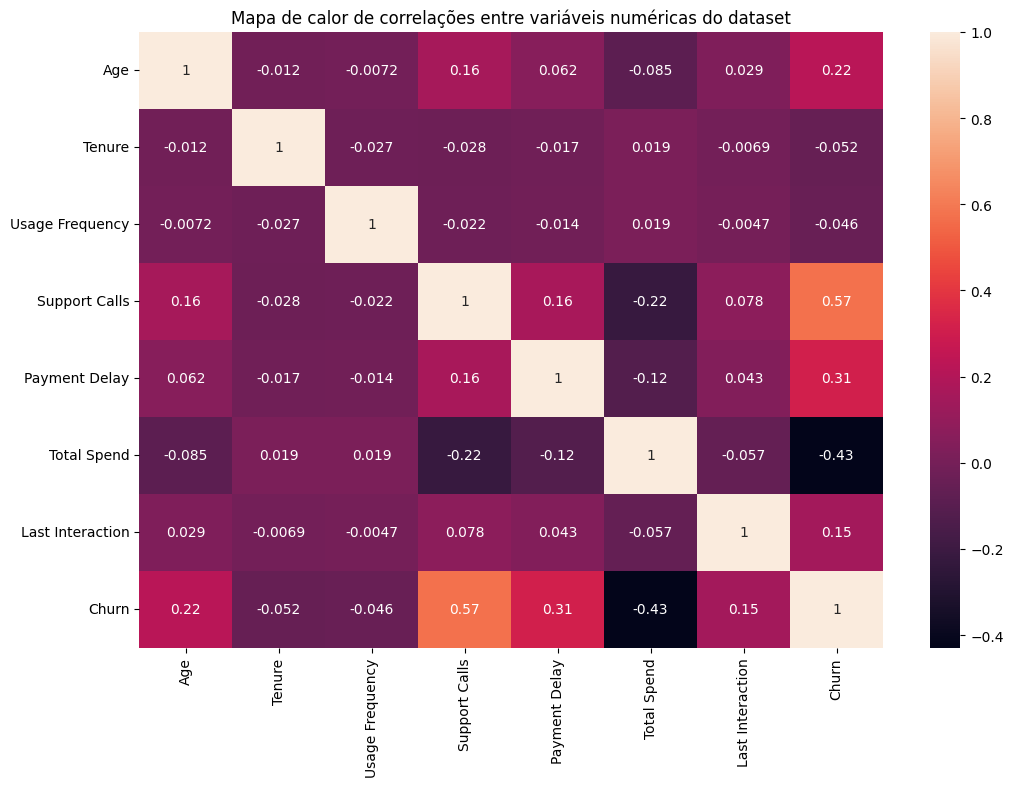

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(churn.corr(numeric_only=True), annot=True)
plt.title('Mapa de calor de correlações entre variáveis numéricas do dataset')
plt.show()

- As features que mais se destacam em correlação com o target são: ```Support Calls, Payment Delay, Total Spend```, seguidas por ```Age, Last Interaction```.
- Além destas, ```Support Calls, Payment Delay, Total Spend```, duas a duas, apresentam certas correlações entre si (variando de -0.22 a 0.16).

In [17]:
#Sugiro não rodar de novo com todos dados, levou 40min na minha máquina
# Podemos quem sabe rodar de novo se fizermos uma amostra estratificada, para ver mantém os padrões
#sns.pairplot(data=churn, hue='Churn')

- Padrões interessantes, em algumas features parece que o SVM se daria muito bem. Em algumas aparece tipo um L, que me lembra muito o AdaBoost/XGBoost, mas observando as curvas kdemas, acredito que deve ter bastante sobreposição também.

### Machine Learning

Baseado no que vimos nesse módulo, o que acredito que seria bacana fazer:
- XGBoost *Classifier*
- Suport Vector Machine *Classifier*
- PCA *(p/ diminuir dimensionalidade)*

Como não temos muitas features mas temos mais de 440 mil observações, talvez seja necessário e interessante:
- Rodar o PCA logo no começo pra reduzir a dimensionalidade (ver se algum PCA tem baixa influência)
- Amostra estratificada para rodar os modelos enquanto estamos testando (por questão de agilidade, meu pc não é dos melhores) e depois de tunado ai sim rodar com todas observações
- 

#### Amostra Estratificada

In [80]:
# Amostra estratificada: pega 40% do dataset inicial
str_churn = churn.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.40))
str_churn.shape     

(176333, 11)

In [81]:
churn['Churn'].value_counts(normalize=True), str_churn['Churn'].value_counts(normalize=True)

(Churn
 1.0    0.567107
 0.0    0.432893
 Name: proportion, dtype: float64,
 Churn
 1.0    0.567109
 0.0    0.432891
 Name: proportion, dtype: float64)

Pra verificar se a amostra era representativa, rodei todos os gráficos que fizemos acima para o dataset estratificado. Todas as distribuições e tendências permaneceram iguais.
Assim, acredito que seja possível usar essa amostra para os testes e tunagem dos hiperparâmetros, deve agiilizar nosso processo.
Ao definir os hiperparâmetros da amostragem, acho que podemos rodar com o dataset completo, diminuindo o range no momento de tunagem.

#### PCA
**Objetivo:** Diminuir dimensionalidade

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [84]:
#Dividindo o dataset em treino e teste
X = str_churn.drop(columns=['Churn'])
y = str_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Manipulação dos dados

- ✅ ```Scaling``` das features numéricas (precisa pois PCA trabalha com distância). 

- 💬  Pesquisar (e executar, se necessário) encoding para features categórica ao usar PCA (segundo o chatgpt precisa).


In [87]:
#Realizando o "scaling" dos dados numéricos

#Colunas com features numéricas:
numeric_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

pipe_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Aplicar as transformações nas colunas numéricas do DataFrame
str_churn[numeric_columns] = pipe_transformer.fit_transform(str_churn[numeric_columns])